# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [521]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn import linear_model


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [556]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/Desktop/MIDS Jan 2017/')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

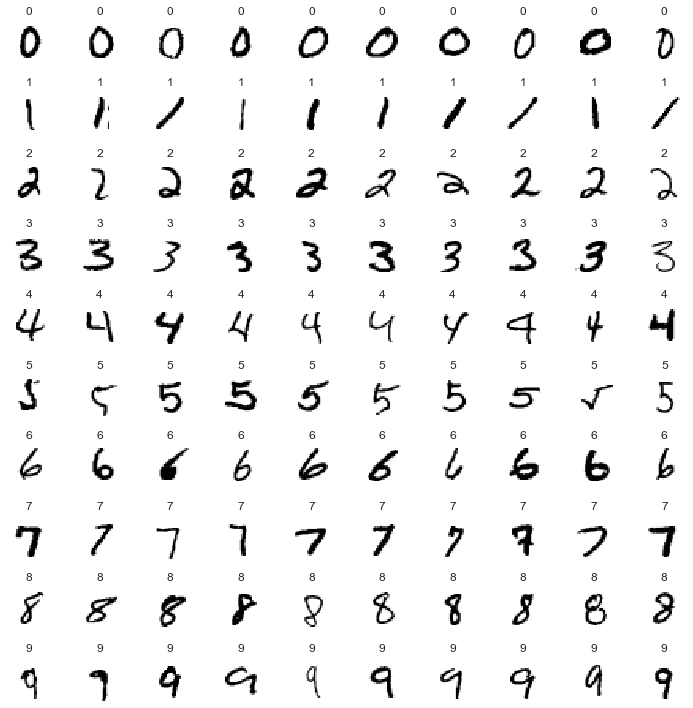

In [439]:
#def P1(num_examples=10):

### STUDENT START ###
def P1(numbers, num_of_examples):
    plt.figure(figsize = (10,10)) #set figure size to 10 x 10
    plt.rc("image", cmap = "binary") #ensure black and white only

    #run through 100 instances of data
    for i in range(numbers):
        for j in range(num_of_examples):
            plt.subplot(10,10,i*10+j+1)
            plt.imshow(X[Y==i][j].reshape(28,28))
            plt.title(i)
            plt.xticks(())
            plt.yticks(())
    plt.tight_layout()
    plt.show()

### STUDENT END ###

P1(10, 10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [558]:
#def P2(k_values):

### STUDENT START ###
def P2(k_values):

    for i in k_values:
        knn = KNeighborsClassifier(n_neighbors = i ,metric='euclidean')
        knn.fit(mini_train_data, mini_train_labels)
        expected = dev_labels
        predicted = knn.predict(dev_data)
        acc = accuracy_score(expected, predicted)
        print "K-Value is ", i , " ; Level of Accuracy: ", "{0:.1f}%".format(acc * 100)
        if i == 1:
            print(metrics.classification_report(expected, predicted))
    print " "

k_values = [1, 3, 5, 7, 9]
P2(k_values)

K-Value is  1  ; Level of Accuracy:  88.6%
             precision    recall  f1-score   support

        0.0       0.96      0.97      0.97       120
        1.0       0.86      0.99      0.92       118
        2.0       0.96      0.82      0.89        96
        3.0       0.92      0.87      0.90       111
        4.0       0.84      0.87      0.85        94
        5.0       0.83      0.90      0.86        80
        6.0       0.95      0.92      0.94       105
        7.0       0.82      0.90      0.86        92
        8.0       0.87      0.74      0.80        91
        9.0       0.83      0.81      0.82        93

avg / total       0.89      0.89      0.89      1000

K-Value is  3  ; Level of Accuracy:  87.9%
K-Value is  5  ; Level of Accuracy:  88.0%
K-Value is  7  ; Level of Accuracy:  87.3%
K-Value is  9  ; Level of Accuracy:  86.5%
 


ANSWER: 

### The most difficult digit to accurately classify is "1". I believe this is due to individuals having many different styles of writing that could easily blend a 1 with other numbers (specifically 7 and 9). 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [186]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
acc_output = np.zeros(len(train_sizes))

def P3(train_sizes):
    j = 0
    for i in train_sizes:
        start = time.time()
        knn = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
        knn.fit(train_data[:i], train_labels[:i])
        expected = dev_labels
        predicted = knn.predict(dev_data)
        acc_output[j] = accuracy_score(expected, predicted)
        end = time.time()
        print "Accuracy w/ Training Size of" , i , "is " , "{0:.1f}%".format(acc_output[j] * 100), "requiring", "{0:.3f}".format(end - start), "seconds.\n"
        j+=1
    return acc_output

### STUDENT END ###

P3(train_sizes)

Accuracy w/ Training Size of 100 is  70.0% requiring 0.124 seconds.

Accuracy w/ Training Size of 200 is  80.1% requiring 0.212 seconds.

Accuracy w/ Training Size of 400 is  84.2% requiring 0.507 seconds.

Accuracy w/ Training Size of 800 is  87.8% requiring 0.947 seconds.

Accuracy w/ Training Size of 1600 is  91.1% requiring 1.923 seconds.

Accuracy w/ Training Size of 3200 is  92.3% requiring 3.922 seconds.

Accuracy w/ Training Size of 6400 is  94.7% requiring 7.995 seconds.

Accuracy w/ Training Size of 12800 is  95.3% requiring 17.566 seconds.

Accuracy w/ Training Size of 25000 is  96.3% requiring 37.506 seconds.



array([ 0.7  ,  0.801,  0.842,  0.878,  0.911,  0.923,  0.947,  0.953,
        0.963])

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

### The below plot shows the accuracy of knn asymptotically approaching 1 as the training size increases. However, the linear regression implies the accuracy would surpass 1 with a training size between 25K and 30K - indicating we should not use a linear regression in this instance for larger sample sizes.

('Coefficients: ', array([[  6.40259483e-06]]))


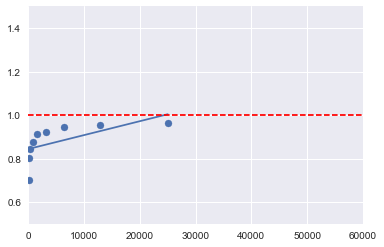

In [446]:
def P4():

### STUDENT START ###

    #reshape vectors in preparation for linear regression
    acc_reshape = pd.DataFrame(acc_output)
    train_reshape = pd.DataFrame(train_sizes)

    #run regression of training data size vs accuracy
    regr = LinearRegression()
    regr.fit(train_reshape, acc_reshape)

    print("Coefficients: ", regr.coef_)
    plt.scatter(train_sizes, acc_output)
    plt.plot(train_sizes, regr.predict(train_reshape))
    plt.axhline(y = 1.0, color = 'r', linestyle = '--')
    plt.xlim([0, 60000]), plt.ylim([0.5, 1.5])
    plt.show()

### STUDENT END ###

P4()

ANSWER:

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix from Dev Data vs Training Data w/ KNN = 1 



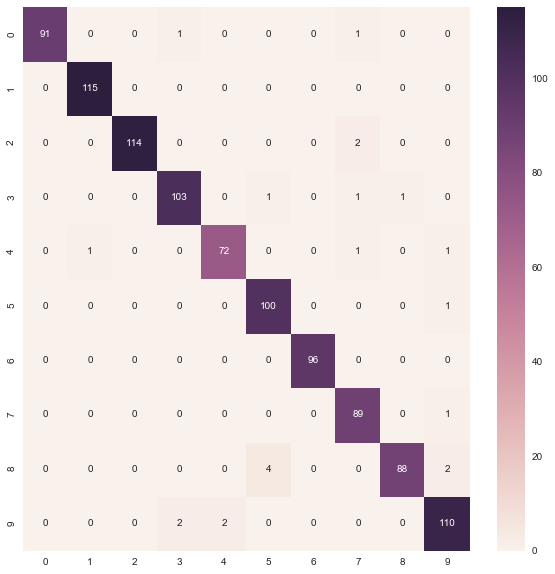

Below are instances of 8s that were confused as 5s


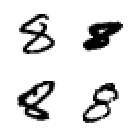

In [447]:
import seaborn as sb
def P5():

### STUDENT START ###
    knn = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
    knn.fit(train_data, train_labels)
    expected = dev_labels
    predicted = knn.predict(dev_data)
    print "Confusion Matrix from Dev Data vs Training Data w/ KNN = 1 \n"
    m = confusion_matrix(expected, predicted)
    df_cm = pd.DataFrame(m, index = [i for i in range(10)], columns = [i for i in range(10)]) 
    plt.figure(figsize = (10,10))
    #recognize this is extra but I thougth this would help visualize
    sb.heatmap(df_cm, annot = True, fmt = "d")
    plt.show()
    
    #display examples where digits have been incorrectly identified
    example_mistakes = dev_data[np.array(predicted == 5) & np.array(expected == 8)]
    print "Below are instances of 8s that were confused as 5s"
    plt.figure(figsize = (2,2))
    for i in range(len(example_mistakes)):
        plt.subplot(2,2, i+1)
        plt.imshow(example_mistakes[i].reshape(28,28))
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()
    ### STUDENT END ###
    

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [10]:
#def P6():
    
### STUDENT START ###


### STUDENT END ###

#P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [602]:
def P7():

    #print mini_train_data.shape
    #print mini_train_labels[3]
    #print list(enumerate(mini_train_data))
### STUDENT START ###

    nb = BernoulliNB(binarize = 0.5)
    nb.fit(mini_train_data, mini_train_labels)
    predict_nb = nb.predict(dev_data)
    print "Bernoulli Binary Classification Report \n"
    print classification_report(dev_labels, predict_nb)
    print confusion_matrix(dev_labels, predict_nb)
    print "\n"

    #separate pixel intensity into thirds (1000 iterations of 28x28 pixels)
    #enumerate to attach numerical categorization to data
    #then walk through each datapoint in the vector
    #code not broken out
   
    mnb = MultinomialNB()
    mnb.fit(mini_train_data, mini_train_labels)
    predict_mnb = mnb.predict(dev_data)
    print "MNN Classification Report:"
    print classification_report(predict_mnb ,dev_labels)
    
P7()

Bernoulli Binary Classification Report 

             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91       120
        1.0       0.81      0.97      0.88       118
        2.0       0.80      0.77      0.79        96
        3.0       0.83      0.74      0.78       111
        4.0       0.77      0.76      0.76        94
        5.0       0.71      0.66      0.68        80
        6.0       0.85      0.84      0.85       105
        7.0       0.86      0.82      0.84        92
        8.0       0.68      0.66      0.67        91
        9.0       0.68      0.76      0.72        93

avg / total       0.80      0.80      0.80      1000

[[108   0   1   0   0   5   2   1   2   1]
 [  0 114   1   0   0   1   2   0   0   0]
 [  1   4  74   3   1   1   4   0   8   0]
 [  1   3   9  82   0   4   2   3   7   0]
 [  1   0   0   0  71   0   2   1   1  18]
 [  3   5   0   8   3  53   0   0   3   5]
 [  2   6   2   0   1   4  88   0   2   0]
 [  0   2   1   0  

#### ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [603]:
def P8(alphas):

### STUDENT START ###

    nb2 = BernoulliNB(binarize = 0.5)
    grid = GridSearchCV(nb2, alphas)
    grid.fit(mini_train_data, mini_train_labels)
    return grid

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

nb = P8(alphas)

print "Best alpha value:" , nb.best_estimator_.alpha
print "...Correspondong Accuracy", nb.best_score_
print nb.best_params_ , "\n"

print "Average accuracy on data for alpha = 0", nb.grid_scores_[0]

### STUDENT END ###


Best alpha value: 0.0001
...Correspondong Accuracy 0.782
{'alpha': 0.0001} 

Average accuracy on data for alpha = 0 mean: 0.09400, std: 0.00111, params: {'alpha': 0.0}


ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Initial Model
             precision    recall  f1-score   support

        0.0       0.91      0.88      0.89        91
        1.0       0.87      0.87      0.87       133
        2.0       0.70      0.55      0.62       111
        3.0       0.74      0.51      0.60        98
        4.0       0.70      0.39      0.50       107
        5.0       0.51      0.56      0.53        78
        6.0       0.75      0.86      0.80       101
        7.0       0.85      0.47      0.61        98
        8.0       0.52      0.62      0.57        97
        9.0       0.39      0.87      0.54        86

avg / total       0.71      0.66      0.66      1000



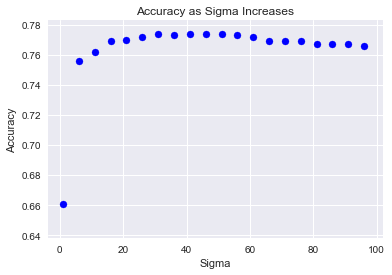

In [554]:
#def P9():

### STUDENT END ###
model = GaussianNB()
model.fit(mini_train_data, mini_train_labels)
expected = dev_labels
prediction = model.predict(dev_data)
print "Initial Model"
print classification_report(expected, prediction)



for i in range (1,100, 5):
    model = GaussianNB()
    model.fit(mini_train_data, mini_train_labels)
    model.sigma_= model.sigma_ / (i)
    expected = dev_labels
    prediction = model.predict(dev_data)
    acc = accuracy_score(expected, prediction)
    plt.scatter(i, acc, color = "blue")
plt.title("Accuracy as Sigma Increases")
plt.ylabel("Accuracy"), plt.xlabel("Sigma")
plt.show()

### STUDENT END ###

#gnb = P9()


ANSWER: ### As shown in the plot above, modifying Sigma can have a dramatic impact on the accuracy outcome. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [601]:
def P10(num_examples):

### STUDENT START ###

    bn3 = BernoulliNB(binarize = 0.5)
    bn3 = bn3.fit(mini_train_data, mini_train_labels)
    probable_intensity = np.exp(bn3.feature_log_prob_)
    random_array = np.random.rand(784)
    plt.figure(figsize = (10,10)) #set figure size to 10 x 10
    plt.rc("image", cmap = "binary") #ensure black and white only
 
    #walk through each unique digit (0 through 9)
    #walk through the number of instances per digi (in this case 20)
    #walk through each pixels intensity and compare with the random figure
    #binarize this

   
### STUDENT END ###

P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [563]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
       
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

0


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()